# Titanic Dataset

## Cleaning the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
pwd = os.getcwd()
filepath_train = os.path.join(pwd, "datasets/train.csv")
filepath_test = os.path.join(pwd, "datasets/test.csv")

In [3]:
df_train = pd.read_csv(filepath_train)
df_test = pd.read_csv(filepath_test)

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

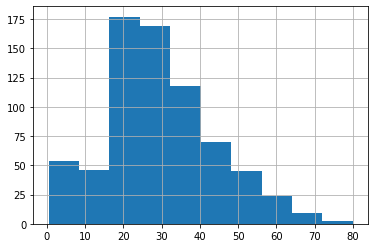

In [7]:
df_train["Age"].hist()

In [8]:
df_train["Embarked"] = df_train["Embarked"].fillna('S')

In [9]:
df_train["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [10]:
df_train["Name"].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [11]:
df_train["Cabin"].unique()


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

We will use the `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, and `Embarked` columns for the initial analysis. 

In [12]:
features_train = df_train.iloc[:,[2,4,5,6,7,9,11]]
features_test = df_test.iloc[:,[1,3,4,5,6,8,10]]

In [13]:
labels_train = df_train.iloc[:,[1]]

In [14]:
features_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [15]:
print(features_train.columns)
print(features_train.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')


## Preparing data for ML

Data preparation is often the most time-consuming step of the modeling process. It is also one of the most important with model accuracy often contingent on the quality of data inserted. To this end, we will be applying one or more of the following transformations on this data: 

- **Imputation:** Inserting values where they might be missing
- **Encoding:** Transforming categorical variables into some numerical variables
- **Feature Engineering:** Creating new features (columns) out of our raw data using domain knowledge
- **Scaling:** Applying a scaler that transforms all of our data on the same numerical scale 

### Imputation

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [17]:
features_train_num = features_train.select_dtypes(include=np.number) #selects only the columns that have numerical entries (int, float, etc.)
features_test_num = features_test.select_dtypes(include=np.number) #selects only the columns that have numerical entries (int, float, etc.)

imputer.fit(features_train_num)
imputer.fit(features_test_num)

SimpleImputer(strategy='median')

In [18]:
X_train = imputer.transform(features_train_num)
X_test = imputer.transform(features_test_num)

In [19]:
imputed_X_train = pd.DataFrame(X_train, columns=features_train_num.columns, index=features_train.index)
imputed_X_test = pd.DataFrame(X_test, columns=features_test_num.columns, index=features_test.index)

In [20]:
len(imputed_X_train.columns)

5

In [21]:
imputed_X_train

,Pclass,Age,SibSp,Parch,Fare
0,3.0,22.0,1.0,0.0,7.2500
1,1.0,38.0,1.0,0.0,71.2833
2,3.0,26.0,0.0,0.0,7.9250
3,1.0,35.0,1.0,0.0,53.1000
4,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...
886,2.0,27.0,0.0,0.0,13.0000
887,1.0,19.0,0.0,0.0,30.0000
888,3.0,27.0,1.0,2.0,23.4500
889,1.0,26.0,0.0,0.0,30.0000


### Encoding

In [22]:
#Choosing the relevet columns that we want to encode

features_train_Sex = np.array(features_train["Sex"]).reshape(-1,1)        
features_test_Sex = np.array(features_test["Sex"]).reshape(-1,1)

features_train_Emb = np.array(features_train["Embarked"]).reshape(-1,1)
features_test_Emb = np.array(features_test["Embarked"]).reshape(-1,1)


#housing_cat = housing_cat.reshape(-1,1)                          #we needed to reshape the array to a 2D array for the encoder to work.

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)

features_train_Sex_1hot = cat_encoder.fit_transform(features_train_Sex)
features_test_Sex_1hot = cat_encoder.fit_transform(features_test_Sex)

features_train_Emb_1hot = cat_encoder.fit_transform(features_train_Emb)
features_test_Emb_1hot = cat_encoder.fit_transform(features_test_Emb)

In [23]:
features_train_Emb_1hot.shape

(891, 3)

### Scaling

Many ML algorithms don't work well with unscaled data. The magnitude of values in a particular can be misleading. Because of this we will scale our values using the StandardScaler which will scale the values to their z-score within their column like so:

$$z = \frac{x-u}{\sigma}$$

where $x$ is the value, $u$ is the mean and $\sigma$ is the standard deviation.

## Select and Train a Model

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_scaled = scaler.fit_transform(imputed_X_train)
test_scaled = scaler.fit_transform(imputed_X_test)

In [25]:
train_data = np.hstack([train_scaled, features_train_Sex_1hot, features_train_Emb_1hot])
test_data = np.hstack([test_scaled, features_test_Sex_1hot, features_test_Emb_1hot])

In [26]:
train_data

array([[ 0.82737724, -0.5493354 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.67772773,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.24256962, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.16587817,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.24256962, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.21757905, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [27]:
test_data.shape

(418, 10)

### RandomForestClassifier

In [28]:
y_train = np.ravel(labels_train)

In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

rfc.fit(train_data, y_train)

RandomForestClassifier(random_state=42)

In [30]:
rfc_predictions = rfc.predict(test_data)

In [31]:
rfc_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [32]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [33]:
params = { 
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, .030],
    "max_depth"        : [2,3,4,5,7,9,11,13,15],
    "min_child_weight" : [1,2,5,7,9],
    "gamma"            : [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7]
 }

In [34]:
classifier = xgb.XGBClassifier()

In [35]:
random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter=10, scoring='roc_auc', n_jobs=-1, cv=5, verbose=1)

In [36]:
random_search.fit(train_data, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

In [37]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [38]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.2,
 'gamma': 0.0,
 'colsample_bytree': 0.4}

In [39]:
classifier_best = random_search.best_estimator_

xgb_predictions = classifier_best.predict(test_data)

In [40]:
d = {"PassengerId" : df_test["PassengerId"], "Survived" : xgb_predictions}
results = pd.DataFrame(d)

In [41]:
results

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [42]:
results.to_csv('results.csv', index=False)

In [45]:
xgb_clf = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

xgb_clf.fit(train_data, y_train)
y_pred = xgb_clf.predict(test_data)

In [46]:
d = {"PassengerId" : df_test["PassengerId"], "Survived" : xgb_predictions}
results = pd.DataFrame(d)

In [47]:
results.to_csv('results.csv', index=False)

In [48]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnf_clf = RandomForestClassifier()
svc_clf = SVC()

voting_clf = VotingClassifier(estimators=[('lr', log_clf),('rf', rnf_clf),('sc', svc_clf)], voting="hard")

In [49]:
y_pred = voting_clf.fit(train_data, y_train)

d = {"PassengerId" : df_test["PassengerId"], "Survived" : xgb_predictions}
results1 = pd.DataFrame(d)
results1.to_csv('results1.csv', index=False)